In [1]:
import pandas as pd
import mysql.connector
import numpy as np
import sys
sys.path.append(r"C:\Users\gbagl\Desktop\Modelli")
import MyLibrary as my
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def value_at_risk(value_invested, returns, weights, alpha=0.95, lookback_days=520):
    returns = returns.fillna(0.0)
    # Multiply asset returns by weights to get one weighted portfolio return
    portfolio_returns = returns.iloc[-lookback_days:].dot(weights)
    # Compute the correct percentile loss and multiply by value invested
    return np.percentile(portfolio_returns, 100 * (1-alpha)) * value_invested



def cvar(value_invested, returns, weights, alpha=0.95, lookback_days=520):
    # Call out to our existing function
    var = value_at_risk(value_invested, returns, weights, alpha, lookback_days=lookback_days)
    returns = returns.fillna(0.0)
    portfolio_returns = returns.iloc[-lookback_days:].dot(weights)
    
    # Get back to a return rather than an absolute loss
    var_pct_loss = var / value_invested
    
    return value_invested * np.nanmean(portfolio_returns[portfolio_returns < var_pct_loss])

In [3]:
sql = """
select * 
from mutual_funds as funds
"""


mycursor = mydb.cursor()

mycursor.execute(sql)

# IMPORTO I DATI DAL 1/1/2000 PER TUTTI FONDI 
### solo 1 fondo ha dati risalenti fino a quel giorno, gli altri sono stati creati dopo

In [4]:
df = pd.DataFrame(mycursor.fetchall())
df.columns = mycursor.column_names
df = df[list(df.columns[~df.columns.duplicated()])]
df = df.set_index('Date').astype(float)
print(df.shape)

(5296, 14)


# Considero le ultime 750 osservazioni (giorni), dal 05 giugno 2017.

In [5]:
df = df.iloc[-750:, :]
print(df.shape)
df.head()

(750, 14)


,LU1116430247,LU0260870158,LU0054237671,LU0846948197,LU0125951151,LU1670724373,LU0119620416,FR0013393329,LU0366534773,IE0004931386,IE0002461055,FR0011253624,AT0000785381,AT0000785209
Date,,,,,,,,,,,,,,
2017-06-05,12.69,13.58,46.33,35.84,41.09,NaN,120.78,NaN,187.84,23.81,30.15,2003.60,NaN,107.52
2017-06-06,12.66,13.58,46.41,35.73,40.78,NaN,121.36,NaN,187.40,23.86,30.19,1998.97,NaN,107.51
2017-06-07,12.68,13.58,46.47,35.72,40.71,NaN,121.30,NaN,187.00,23.84,30.17,1997.14,NaN,107.50
2017-06-08,12.69,13.60,46.84,35.66,40.91,NaN,120.22,NaN,186.75,23.88,30.16,2009.73,NaN,107.50
2017-06-09,12.73,13.82,46.98,35.51,40.58,NaN,119.82,NaN,187.51,23.88,30.17,2018.55,NaN,107.52


# Calcolo i rendimenti giornalieri

In [6]:
returns = df.pct_change()[1:]
cumulative = returns.cumsum()
returns.head(20)

,LU1116430247,LU0260870158,LU0054237671,LU0846948197,LU0125951151,LU1670724373,LU0119620416,FR0013393329,LU0366534773,IE0004931386,IE0002461055,FR0011253624,AT0000785381,AT0000785209
Date,,,,,,,,,,,,,,
2017-06-06,-0.002364,0.000000,0.001727,-0.003069,-0.007544,NaN,0.004802,NaN,-0.002342,0.002100,0.001327,-0.002311,NaN,-0.000093
2017-06-07,0.001580,0.000000,0.001293,-0.000280,-0.001717,NaN,-0.000494,NaN,-0.002134,-0.000838,-0.000662,-0.000915,NaN,-0.000093
2017-06-08,0.000789,0.001473,0.007962,-0.001680,0.004913,NaN,-0.008904,NaN,-0.001337,0.001678,-0.000331,0.006304,NaN,0.000000
2017-06-09,0.003152,0.016176,0.002989,-0.004206,-0.008066,NaN,-0.003327,NaN,0.004070,0.000000,0.000332,0.004389,NaN,0.000186
2017-06-12,-0.002357,-0.031838,-0.013623,-0.004224,-0.006161,NaN,-0.009848,NaN,-0.004586,0.001675,0.000000,-0.001769,NaN,0.000093
2017-06-13,0.002362,0.000747,0.003884,0.004525,0.000992,NaN,0.003624,NaN,0.004447,0.000836,0.000663,0.005122,NaN,0.000093
2017-06-14,-0.004713,0.008215,0.004299,-0.003660,0.000991,NaN,0.005795,NaN,-0.003254,0.002089,0.002319,-0.008823,NaN,0.000000
2017-06-15,0.007893,-0.009630,-0.013913,0.009042,-0.006434,NaN,-0.011106,NaN,-0.001231,-0.003335,-0.001322,-0.003567,NaN,0.000000
2017-06-16,-0.001566,-0.002244,0.000868,0.000560,0.011457,NaN,0.008022,NaN,0.008894,0.000000,0.000662,0.000510,NaN,0.000093


# Somma dei rendimenti giornalieri a partire dal 5 giugno 2017*

Text(0, 0.5, 'price in $')

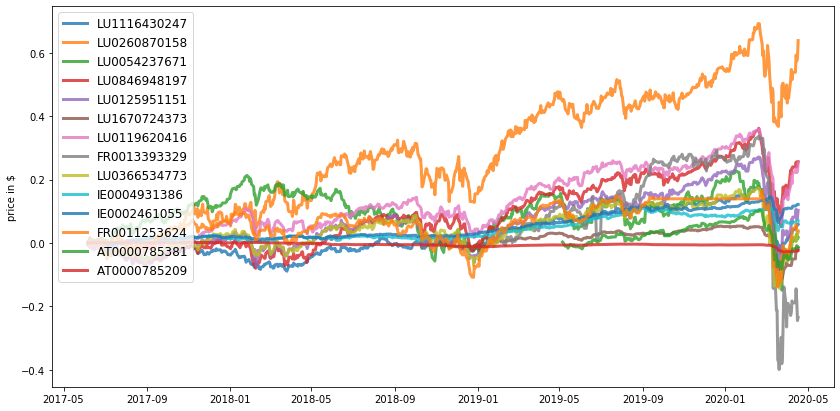

In [55]:
plt.figure(figsize=(14, 7))
for c in cumulative.columns.values:
    plt.plot(cumulative.index, cumulative[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

# Correlazione tra i fondi
### Più è rosso e più la correlazione è forte
### 1 è il massimo e -1 il minimo

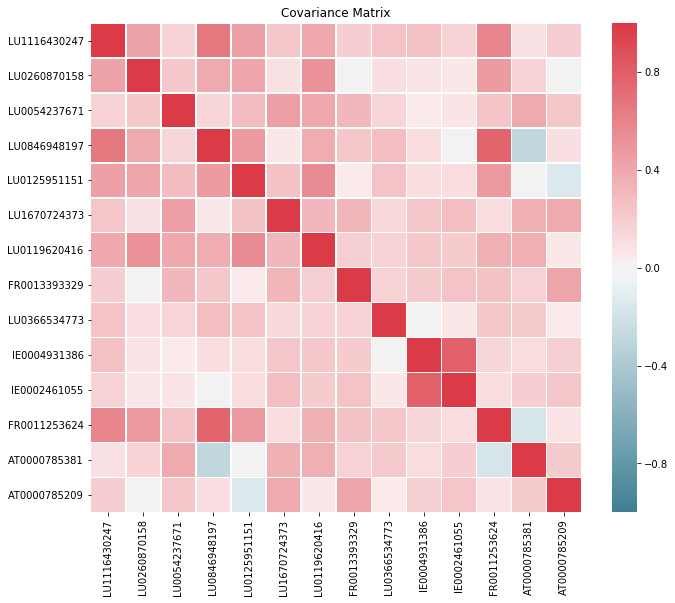

,LU1116430247,LU0260870158,LU0054237671,LU0846948197,LU0125951151,LU1670724373,LU0119620416,FR0013393329,LU0366534773,IE0004931386,IE0002461055,FR0011253624,AT0000785381,AT0000785209
LU1116430247,1.000000,0.430305,0.167331,0.656385,0.443790,0.240031,0.395777,0.199693,0.255610,0.266786,0.168290,0.589751,0.097737,0.197469
LU0260870158,0.430305,1.000000,0.224356,0.389752,0.410276,0.099893,0.515976,-0.016895,0.104844,0.082626,0.056545,0.472529,0.167959,-0.020640
LU0054237671,0.167331,0.224356,1.000000,0.151088,0.295030,0.448412,0.397327,0.319456,0.162284,0.044172,0.075785,0.243111,0.384290,0.234066
LU0846948197,0.656385,0.389752,0.151088,1.000000,0.469826,0.055895,0.382646,0.228519,0.285456,0.114387,0.022577,0.771930,-0.288764,0.102986
LU0125951151,0.443790,0.410276,0.295030,0.469826,1.000000,0.258952,0.557157,0.044721,0.252936,0.113342,0.114792,0.482906,0.004240,-0.147432
LU1670724373,0.240031,0.099893,0.448412,0.055895,0.258952,1.000000,0.319560,0.323888,0.135369,0.236640,0.283712,0.120486,0.355201,0.384309
LU0119620416,0.395777,0.515976,0.397327,0.382646,0.557157,0.319560,1.000000,0.189411,0.170605,0.224634,0.208762,0.358917,0.363206,0.057982
FR0013393329,0.199693,-0.016895,0.319456,0.228519,0.044721,0.323888,0.189411,1.000000,0.171205,0.208675,0.252094,0.259019,0.177079,0.418548
LU0366534773,0.255610,0.104844,0.162284,0.285456,0.252936,0.135369,0.170605,0.171205,1.000000,0.021098,0.058098,0.229255,0.211523,0.042649
IE0004931386,0.266786,0.082626,0.044172,0.114387,0.113342,0.236640,0.224634,0.208675,0.021098,1.000000,0.790638,0.149535,0.119296,0.191174


In [7]:
my.get_correlation(returns)

# IMPOSTAZIONI DEL PORTAFOGLIO
### valore_investito = 85000
### livello di confidenza = 95%
### pesi = quelli che mi hai dato te

In [9]:
value_invested = 80000
lookback_days = 90
confindence_level = 0.95
weights = np.array([0.1005, 0.0526, 0.0491, 0.0501, 0.0495, 0.1030, 0.0499, 0.0978, 0.0492, 0.0496, 0.0991, 0.0506, 0.1003, 0.0986])

In [10]:
portfolio_returns = returns.fillna(0.0).iloc[-lookback_days:].dot(weights)

portfolio_VaR= value_at_risk(value_invested, returns, weights ,confindence_level, lookback_days)
portfolio_VaR_return = portfolio_VaR / value_invested

portfolio_CVaR = cvar(value_invested, returns, weights , confindence_level, lookback_days)
portfolio_CVaR_return = portfolio_CVaR / value_invested

# VAR E CVAR

In [11]:
print ("-"*80)
print ("La var del portafoglio è: ")
print (portfolio_VaR)
print ("\n")
print ("La var percentuale del portafoglio è: ")
print (portfolio_VaR_return)
print ("\n")
print ("-"*80)
print ("La Cvar del portafoglio è: ")
print (portfolio_CVaR)
print ("\n")
print ("La Cvar del portafoglio è: ")
print (portfolio_CVaR_return)
print ("\n")

--------------------------------------------------------------------------------
La var del portafoglio è: 
-1966.3230949832687


La var percentuale del portafoglio è: 
-0.024579038687290857


--------------------------------------------------------------------------------
La Cvar del portafoglio è: 
-2406.0380472811516


La Cvar del portafoglio è: 
-0.030075475591014394




# RISULTATO 
### VAR = -393 euro ovvero 0.4% del portafoglio -> questa è la perdita massima che questo portafoglio può avere in una sola giornata e che questa precisione ha un grado di affidabilità del 95%

### CVAR = -852 euro ovvero 1% del portafoglio ->  stima delle perdite che mi attendo, tenendo in considerazione tutte le possibili perdite che superano la soglia del VAR

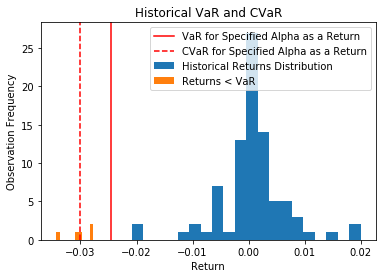

In [12]:
# Plot only the observations > VaR on the main histogram so the plot comes out
# nicely and doesn't overlap.
plt.hist(portfolio_returns[portfolio_returns > portfolio_VaR_return], bins=20)
plt.hist(portfolio_returns[portfolio_returns < portfolio_VaR_return], bins=10)
plt.axvline(portfolio_VaR_return, color='red', linestyle='solid');
plt.axvline(portfolio_CVaR_return, color='red', linestyle='dashed');
plt.legend(['VaR for Specified Alpha as a Return',
            'CVaR for Specified Alpha as a Return',
            'Historical Returns Distribution', 
            'Returns < VaR'])
plt.title('Historical VaR and CVaR');
plt.xlabel('Return');
plt.ylabel('Observation Frequency');

# convergenza var

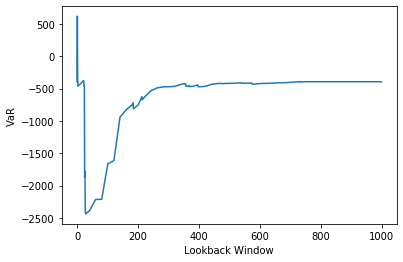

In [13]:
#controlla la convergenza al variare di lookback days
N = 1000
VaRs = np.zeros((N, 1))
for i in range(N):
    VaRs[i] = value_at_risk(value_invested, returns, weights, lookback_days=i)

plt.plot(VaRs)
plt.xlabel('Lookback Window')
plt.ylabel('VaR');

In [14]:
for i in range(N):
    print((i, VaRs[i]))

(0, array([-393.01040741]))
(1, array([620.81703393]))
(2, array([-328.17138272]))
(3, array([-463.0569376]))
(4, array([-458.3381156]))
(5, array([-453.61929359]))
(6, array([-448.90047158]))
(7, array([-444.18164958]))
(8, array([-439.46282757]))
(9, array([-434.74400556]))
(10, array([-430.02518356]))
(11, array([-425.30636155]))
(12, array([-420.58753955]))
(13, array([-415.86871754]))
(14, array([-411.14989553]))
(15, array([-406.43107353]))
(16, array([-401.71225152]))
(17, array([-396.99342952]))
(18, array([-392.27460751]))
(19, array([-387.5557855]))
(20, array([-382.8369635]))
(21, array([-378.11814149]))
(22, array([-377.70241897]))
(23, array([-463.0569376]))
(24, array([-460.29740235]))
(25, array([-1867.00212947]))
(26, array([-1779.84540773]))
(27, array([-2391.40376548]))
(28, array([-2439.46533406]))
(29, array([-2435.5695531]))
(30, array([-2431.67377214]))
(31, array([-2427.77799118]))
(32, array([-2423.88221022]))
(33, array([-2419.98642926]))
(34, array([-2416.0906

(701, array([-403.11911023]))
(702, array([-402.6746869]))
(703, array([-402.23026357]))
(704, array([-401.78584023]))
(705, array([-401.3414169]))
(706, array([-400.89699356]))
(707, array([-400.45257023]))
(708, array([-400.00814689]))
(709, array([-399.56372356]))
(710, array([-399.11930023]))
(711, array([-398.67487689]))
(712, array([-398.23045356]))
(713, array([-397.78603022]))
(714, array([-397.34160689]))
(715, array([-396.89718355]))
(716, array([-396.45276022]))
(717, array([-396.00833689]))
(718, array([-395.56391355]))
(719, array([-395.11949022]))
(720, array([-394.67506688]))
(721, array([-394.23064355]))
(722, array([-394.07811403]))
(723, array([-393.92558451]))
(724, array([-393.773055]))
(725, array([-393.62052548]))
(726, array([-393.46799596]))
(727, array([-393.31546644]))
(728, array([-393.16293692]))
(729, array([-393.01040741]))
(730, array([-392.85787789]))
(731, array([-392.70534837]))
(732, array([-392.55281885]))
(733, array([-392.40028933]))
(734, array([-

# convergenza cvar

C:\Users\gbagl\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice


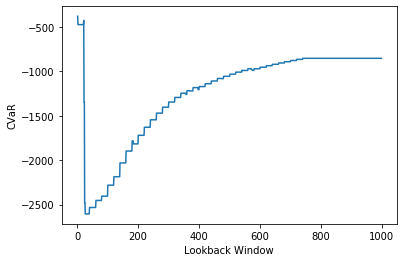

In [15]:
#controlla la convergenza al variare di lookback days
N = 1000
CVaRs = np.zeros((N, 1))
for i in range(N):
    CVaRs[i] = cvar(value_invested, returns, weights, lookback_days=i)

plt.plot(CVaRs)
plt.xlabel('Lookback Window')
plt.ylabel('CVaR');

# Volatility = Std

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.07
Annualised Volatility: 0.09


            LU1116430247  LU0260870158  LU0054237671  LU0846948197  \
allocation          0.27         23.73          3.05          4.91   

            LU0125951151  LU1670724373  LU0119620416  FR0013393329  \
allocation          5.58           1.4         11.54          0.57   

            LU0366534773  IE0004931386  IE0002461055  FR0011253624  \
allocation          2.22         21.69          10.7          0.59   

            AT0000785381  AT0000785209  
allocation          3.76          9.99  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.02
Annualised Volatility: 0.04


            LU1116430247  LU0260870158  LU0054237671  LU0846948197  \
allocation         17.73           1.5          0.17          3.18   



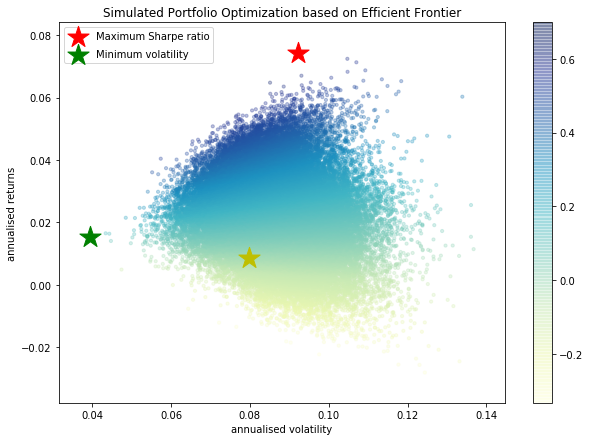

In [17]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns


def random_portfolios(dataframe_dim, num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(dataframe_dim)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record




def display_simulated_ef_with_random(dataframe, mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(dataframe.shape[1], num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=dataframe.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=dataframe.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)
    
    return max_sharpe_allocation, min_vol_allocation

mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 50000
risk_free_rate = 0.01

max_sharpe_allocation, min_vol_allocation = display_simulated_ef_with_random(returns, mean_returns, cov_matrix, num_portfolios, risk_free_rate)


std_papi, returns_papi = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
plt.scatter(std_papi,returns_papi,marker='*',color='y',s=500, label='Maximum Sharpe ratio')

In [146]:
#rendimento 
returns_papi

0.008499082907878838

In [143]:
#volatilià
std_papi

0.07966772187725421

# SECONDA ANALISI

In [3]:
df = pd.read_excel(r'C:\Users\gbagl\Desktop\Database\database_updated\Mutual_Funds.xlsx').set_index('Date')
df = df.loc[:, : 'LU0552385378']
df.head()

,LU1116430247,LU0260870158,LU0054237671,LU0846948197,LU0125951151,LU1670724373,LU0119620416,FR0013393329,LU0366534773,IE0004931386,...,AT0000707096,IE00B11XZ103,IE00B11XYX59,IT0005242984,FR0010306142,LU0260870745,LU0243957742,LU0694238683,LU1445734046,LU0552385378
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,NaN,NaN,13.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,13.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,13.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,14.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,13.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
returns = df.pct_change()[1:]

In [5]:
returns.columns

Index(['LU1116430247', 'LU0260870158', 'LU0054237671', 'LU0846948197',
       'LU0125951151', 'LU1670724373', 'LU0119620416', 'FR0013393329',
       'LU0366534773', 'IE0004931386', 'IE0002461055', 'FR0011253624',
       'AT0000785381', 'AT0000785209', 'FR0010149120', 'AT0000707096',
       'IE00B11XZ103', 'IE00B11XYX59', 'IT0005242984', 'FR0010306142',
       'LU0260870745', 'LU0243957742', 'LU0694238683', 'LU1445734046',
       'LU0552385378'],
      dtype='object')

# Portfolio 1

In [13]:
isin_pt1 = ['FR0010149120', 'AT0000707096', 'IE00B11XZ103', 'IE00B11XYX59']
pt1 = returns[isin_pt1]
pt1.head(-5)

,FR0010149120,AT0000707096,IE00B11XZ103,IE00B11XYX59
Date,,,,
2000-01-03,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,NaN,NaN,NaN,NaN
2000-01-13,NaN,NaN,NaN,NaN


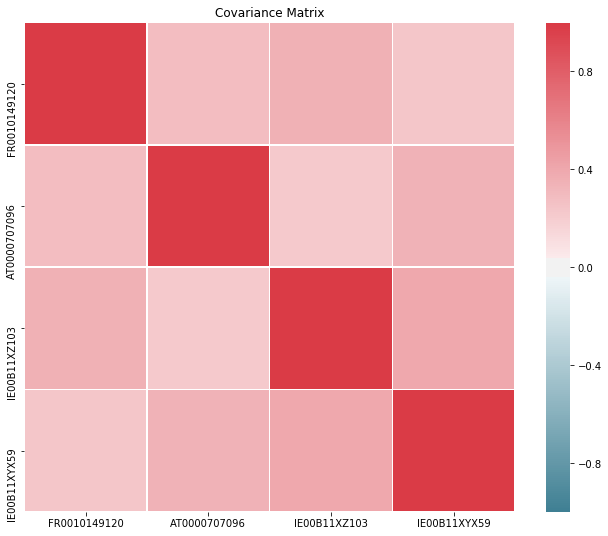

,FR0010149120,AT0000707096,IE00B11XZ103,IE00B11XYX59
FR0010149120,1.000000,0.287499,0.352060,0.234512
AT0000707096,0.287499,1.000000,0.222901,0.344406
IE00B11XZ103,0.352060,0.222901,1.000000,0.398908
IE00B11XYX59,0.234512,0.344406,0.398908,1.000000


In [163]:
my.get_correlation(pt1)

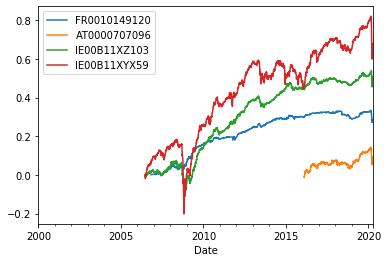

In [130]:
pt1.cumsum().plot()

In [7]:
value_invested1 = 31432
lookback_days = 252
confindence_level = 0.95
weights = np.array([0.6341, 0.1284, 0.1236, 0.1139])

In [8]:
pt1_returns = pt1.fillna(0.0).iloc[-lookback_days:].dot(weights)
pt1_returns.head()

Date
2019-05-02   -0.000366
2019-05-03    0.000147
2019-05-06    0.000340
2019-05-07    0.000118
2019-05-08   -0.000467
dtype: float64

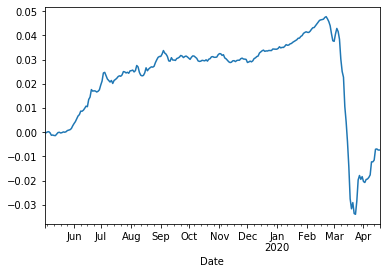

In [9]:
pt1_returns.cumsum().plot()

In [10]:
portfolio_VaR= value_at_risk(value_invested1, pt1, weights ,confindence_level, lookback_days)
portfolio_VaR_return = portfolio_VaR / value_invested1

portfolio_CVaR = cvar(value_invested1, pt1, weights , confindence_level, lookback_days)
portfolio_CVaR_return = portfolio_CVaR / value_invested1

--------------------------------------------------------------------------------
La var del portafoglio è: 
-72.47656927990968


La var percentuale del portafoglio è: 
-0.002305821114784604


--------------------------------------------------------------------------------
La Cvar del portafoglio è: 
-203.04620332835344


La Cvar del portafoglio è: 
-0.00645985630339633




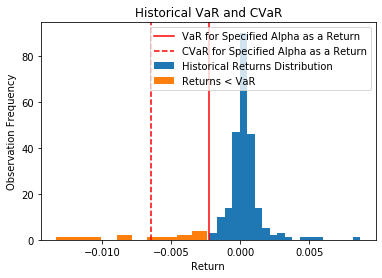

In [12]:
# VAR E CVAR

print ("-"*80)
print ("La var del portafoglio è: ")
print (portfolio_VaR)
print ("\n")
print ("La var percentuale del portafoglio è: ")
print (portfolio_VaR_return)
print ("\n")
print ("-"*80)
print ("La Cvar del portafoglio è: ")
print (portfolio_CVaR)
print ("\n")
print ("La Cvar del portafoglio è: ")
print (portfolio_CVaR_return)
print ("\n")

# Plot only the observations > VaR on the main histogram so the plot comes out
# nicely and doesn't overlap.
plt.hist(pt1_returns[pt1_returns > portfolio_VaR_return], bins=20)
plt.hist(pt1_returns[pt1_returns < portfolio_VaR_return], bins=10)
plt.axvline(portfolio_VaR_return, color='red', linestyle='solid');
plt.axvline(portfolio_CVaR_return, color='red', linestyle='dashed');
plt.legend(['VaR for Specified Alpha as a Return',
            'CVaR for Specified Alpha as a Return',
            'Historical Returns Distribution', 
            'Returns < VaR'])
plt.title('Historical VaR and CVaR');
plt.xlabel('Return');
plt.ylabel('Observation Frequency');

In [20]:
#riprova
len(pt1_returns) 
elenco = np.sort(pt1_returns)
np.percentile(elenco, 5)

-0.0023058211147846054

# Portfolio 2

In [136]:
isin_pt2 = ['IT0005242984', 'FR0010306142', 'LU0260870745', 'LU0243957742', 'LU0694238683', 'LU1445734046', 'LU0552385378', 'AT0000785381']
pt2 = returns[isin_pt2]
pt2.head(-5)

,IT0005242984,FR0010306142,LU0260870745,LU0243957742,LU0694238683,LU1445734046,LU0552385378,AT0000785381
Date,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


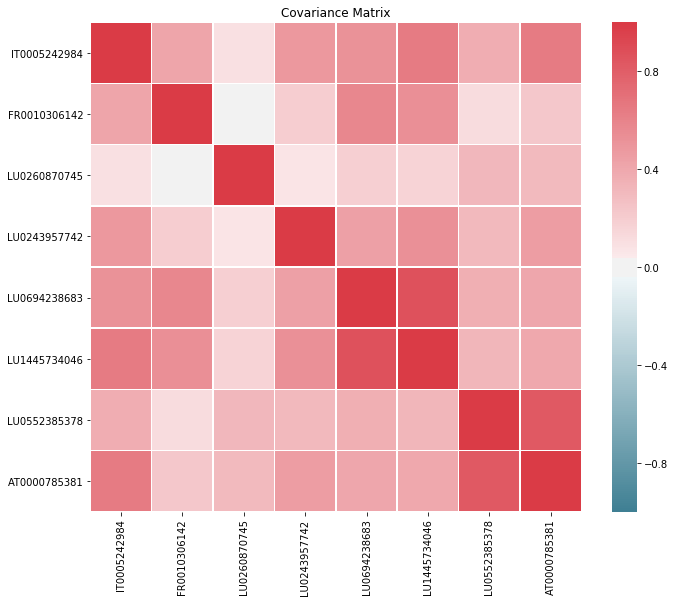

,IT0005242984,FR0010306142,LU0260870745,LU0243957742,LU0694238683,LU1445734046,LU0552385378,AT0000785381
IT0005242984,1.000000,0.416041,0.097694,0.490996,0.515832,0.641458,0.368527,0.641535
FR0010306142,0.416041,1.000000,0.037526,0.198541,0.581426,0.537157,0.119586,0.229649
LU0260870745,0.097694,0.037526,1.000000,0.074135,0.193295,0.166574,0.312593,0.301530
LU0243957742,0.490996,0.198541,0.074135,1.000000,0.440162,0.526342,0.308106,0.456826
LU0694238683,0.515832,0.581426,0.193295,0.440162,1.000000,0.868800,0.363276,0.413920
LU1445734046,0.641458,0.537157,0.166574,0.526342,0.868800,1.000000,0.327212,0.403252
LU0552385378,0.368527,0.119586,0.312593,0.308106,0.363276,0.327212,1.000000,0.832471
AT0000785381,0.641535,0.229649,0.301530,0.456826,0.413920,0.403252,0.832471,1.000000


In [164]:
my.get_correlation(pt2)

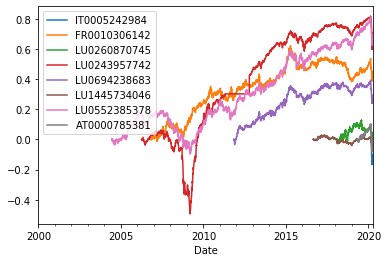

In [137]:
pt2.cumsum().plot()

In [138]:
value_invested2 = 49447
lookback_days = 500
confindence_level = 0.95
weights = np.array([0.0616, 0.0631, 0.0932, 0.1557, 0.079, 0.0253, 0.0297, 0.0514]) *  100 / 55.9

In [139]:
pt2_returns = pt2.fillna(0.0).iloc[-lookback_days:].dot(weights)
pt2_returns.head()

Date
2018-05-21   -0.001151
2018-05-22    0.000222
2018-05-23   -0.000206
2018-05-24    0.000584
2018-05-25   -0.001084
dtype: float64

--------------------------------------------------------------------------------
La var del portafoglio è: 
-189.1533559289514


La var percentuale del portafoglio è: 
-0.00382537577464662


--------------------------------------------------------------------------------
La Cvar del portafoglio è: 
-404.614935433525


La Cvar del portafoglio è: 
-0.008182800482001436




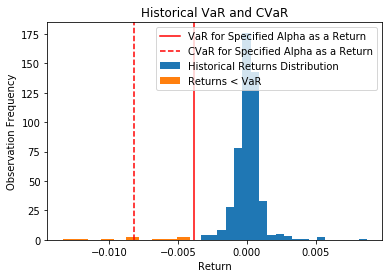

In [140]:
portfolio_VaR= value_at_risk(value_invested2, pt2, weights ,confindence_level, lookback_days)
portfolio_VaR_return = portfolio_VaR / value_invested2

portfolio_CVaR = cvar(value_invested2, pt2, weights , confindence_level, lookback_days)
portfolio_CVaR_return = portfolio_CVaR / value_invested2

# VAR E CVAR

print ("-"*80)
print ("La var del portafoglio è: ")
print (portfolio_VaR)
print ("\n")
print ("La var percentuale del portafoglio è: ")
print (portfolio_VaR_return)
print ("\n")
print ("-"*80)
print ("La Cvar del portafoglio è: ")
print (portfolio_CVaR)
print ("\n")
print ("La Cvar del portafoglio è: ")
print (portfolio_CVaR_return)
print ("\n")

# Plot only the observations > VaR on the main histogram so the plot comes out
# nicely and doesn't overlap.
plt.hist(portfolio_returns[portfolio_returns > portfolio_VaR_return], bins=20)
plt.hist(portfolio_returns[portfolio_returns < portfolio_VaR_return], bins=10)
plt.axvline(portfolio_VaR_return, color='red', linestyle='solid');
plt.axvline(portfolio_CVaR_return, color='red', linestyle='dashed');
plt.legend(['VaR for Specified Alpha as a Return',
            'CVaR for Specified Alpha as a Return',
            'Historical Returns Distribution', 
            'Returns < VaR'])
plt.title('Historical VaR and CVaR');
plt.xlabel('Return');
plt.ylabel('Observation Frequency');

# Portfolio 1 + 2

In [148]:
value_invested_tot = value_invested1 + value_invested2
w1 = value_invested1 / value_invested_tot
w2 = value_invested2 / value_invested_tot
print('investimento: ' + str(value_invested_tot))
print('w1:' + str(w1))
print('w2:' + str(w2))

investimento: 80879
w1:0.38862992865886076
w2:0.6113700713411392


In [151]:
pt_returns = pt1_returns * w1  + pt2_returns * w2
pt_returns.head()

Date
2018-05-21   -0.001165
2018-05-22    0.000121
2018-05-23   -0.000403
2018-05-24    0.000632
2018-05-25   -0.001148
dtype: float64

(array([  2.,   1.,   1.,   1.,   3.,   2.,   0.,   6.,   4.,  22.,  81.,
        203., 137.,  29.,   3.,   0.,   2.,   2.,   0.,   1.]),
 array([-0.01432674, -0.01308642, -0.0118461 , -0.01060578, -0.00936546,
        -0.00812514, -0.00688482, -0.0056445 , -0.00440418, -0.00316386,
        -0.00192354, -0.00068322,  0.0005571 ,  0.00179741,  0.00303773,
         0.00427805,  0.00551837,  0.00675869,  0.00799901,  0.00923933,
         0.01047965]),
 <a list of 20 Patch objects>)

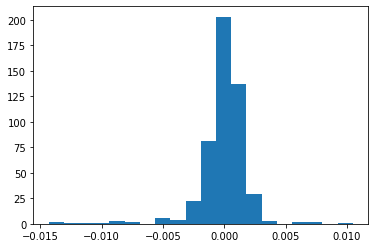

In [152]:
plt.hist(pt_returns, bins= 20)

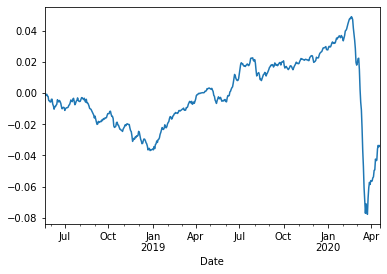

In [153]:
pt_returns.cumsum().plot()

In [154]:
alpha = 0.95
pt_var = np.percentile(pt_returns, 100 * (1-alpha)) * value_invested_tot
portfolio_VaR_return = pt_var / value_invested_tot

-204.46496264672984

In [157]:
var_pct_loss = pt_var / value_invested_tot
pt_cvar = value_invested_tot * np.nanmean(pt_returns[pt_returns < var_pct_loss])
portfolio_CVaR_return = pt_cvar / value_invested_tot

In [158]:
print ("-"*80)
print ("La var del portafoglio è: ")
print (pt_var)
print ("\n")
print ("La var percentuale del portafoglio è: ")
print (portfolio_VaR_return)
print ("\n")
print ("-"*80)
print ("La Cvar del portafoglio è: ")
print (pt_cvar)
print ("\n")
print ("La Cvar del portafoglio è: ")
print (portfolio_CVaR_return)
print ("\n")

--------------------------------------------------------------------------------
La var del portafoglio è: 
-204.46496264672984


La var percentuale del portafoglio è: 
-0.00382537577464662


--------------------------------------------------------------------------------
La Cvar del portafoglio è: 
-526.1260304296276


La Cvar del portafoglio è: 
-0.006505100587663393




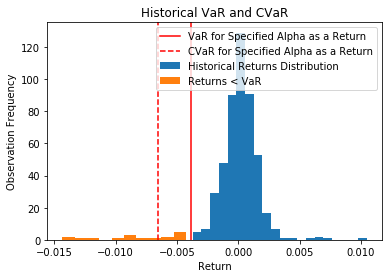

In [160]:
# nicely and doesn't overlap.
plt.hist(pt_returns[pt_returns > portfolio_VaR_return], bins=20)
plt.hist(pt_returns[pt_returns < portfolio_VaR_return], bins=10)
plt.axvline(portfolio_VaR_return, color='red', linestyle='solid');
plt.axvline(portfolio_CVaR_return, color='red', linestyle='dashed');
plt.legend(['VaR for Specified Alpha as a Return',
            'CVaR for Specified Alpha as a Return',
            'Historical Returns Distribution', 
            'Returns < VaR'])
plt.title('Historical VaR and CVaR');
plt.xlabel('Return');
plt.ylabel('Observation Frequency');

# PYFOLIO

In [165]:
import pyfolio as pf

C:\Users\gbagl\Anaconda3\lib\site-packages\pyfolio\pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [188]:
mydb = mysql.connector.connect(
  host="127.0.0.1",
  user="gianlucabaglini",
  passwd="superjanluk96*",
  database="factset_database_new"
)

sql = """
select Date, SP50
from equity_global as ind
"""


mycursor = mydb.cursor()
mycursor.execute(sql)

# IMPORTO I DATI DAL 1/1/2000 PER TUTTI FONDI 
### solo 1 fondo ha dati risalenti fino a quel giorno, gli altri sono stati creati dopo

df = pd.DataFrame(mycursor.fetchall())
df.columns = mycursor.column_names
df = df[list(df.columns[~df.columns.duplicated()])]
benchmark = df.set_index('Date').astype(float)
benchmark = benchmark.loc['2018-05-21]':, :]

TypeError: '<' not supported between instances of 'datetime.date' and 'str'

In [187]:
pt_returns.index[0]

Timestamp('2018-05-21 00:00:00')

In [ ]:
benchemark_ret = benchmark.pct_change()
print(benchmark.shape)
benchemark_ret.head()

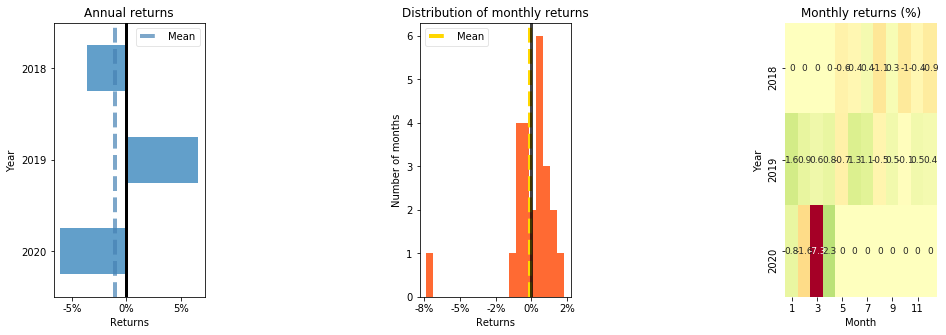

In [169]:
fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(pt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(pt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(pt_returns)
plt.tight_layout()
fig.set_size_inches(15,5)

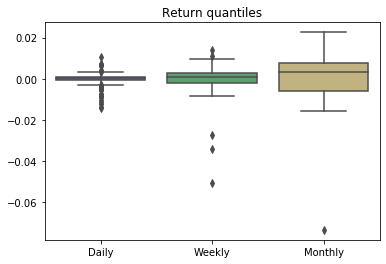

In [189]:
pf.plot_return_quantiles(pt_returns)

In [ ]:
pf.plot_rolling_beta(pt_returns, benchmark_rets);

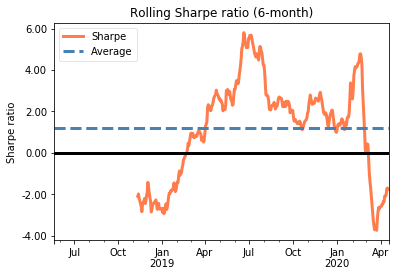

In [190]:
pf.plot_rolling_sharpe(pt_returns);

C:\Users\gbagl\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


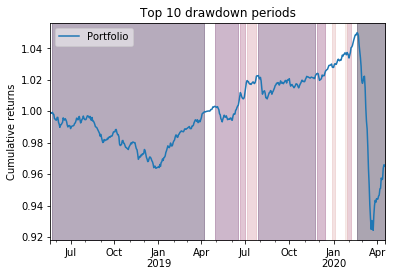

In [192]:
pf.plot_drawdown_periods(pt_returns);

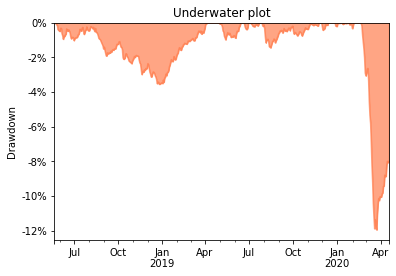

In [194]:
pf.plot_drawdown_underwater(pt_returns);

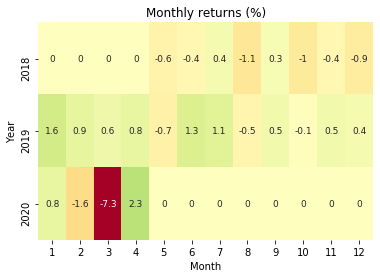

In [195]:
pf.plot_monthly_returns_heatmap(pt_returns);

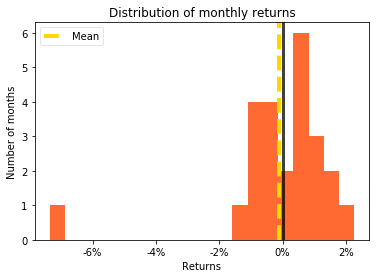

In [196]:
pf.plot_monthly_returns_dist(pt_returns)